# Proyecto Final - Aprendizaje Automático - Diego Estrada

## Problema de interés: Calidad de agua en el Río de la Plata

##  Analisis exploratorio de los datos (EDA)

Comenzamos cargando el dataset unificado al notebook

In [4]:
import os
import pandas as pd

#Ruta del archivo unificado
ruta_archivo = r'C:\Users\destrada\Ciencia_datos_2A1C\Cookiecutter_Proyecto_Final\data\processed\df_final_Unificado.csv'

#Verificamos si el archivo existe y lo cargamos
if os.path.exists(ruta_archivo):
    df_final = pd.read_csv(ruta_archivo)
else:
    print("El archivo no fue encontrado en la ruta especificada.")

#Mostramos la primeras filas
df_final.head()

,año,tem_agua,tem_aire,od,ph,olores,color,espumas,mat_susp,colif_fecales_ufc_100ml,...,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua,campaña_invierno,campaña_otono,campaña_primavera,campaña_verano
0,2013,10.3,14.5,0.7,7.9,0,0,0,0,130.0,...,0.006,0.002,10.0,0.5,62.0,2,1,0,0,0
1,2013,10.5,14.5,0.5,7.5,0,0,0,0,490.0,...,0.006,0.002,10.0,0.5,50.0,2,1,0,0,0
2,2013,10.6,14.5,0.5,7.5,0,0,0,0,34.8,...,0.006,0.002,10.0,0.5,27.0,3,1,0,0,0
3,2013,10.4,14.5,0.7,7.4,0,0,0,0,330.0,...,0.006,0.002,10.0,0.5,54.0,2,1,0,0,0
4,2013,10.3,14.5,0.8,7.5,0,0,0,0,91.8,...,0.006,0.002,10.0,0.5,26.0,3,1,0,0,0


Vamos a analizar las estadísticas descriptivas, lo cual nos permitirá obtener una visión clara y rápida sobre cómo están distribuidos y estructurados los datos. 

In [6]:
#Estadísticas generales
print(df_final.describe())

#Medianas de cada columna
print(df_final.median(numeric_only=True))

               año     tem_agua     tem_aire           od           ph  \
count  1182.000000  1182.000000  1182.000000  1182.000000  1182.000000   
mean   2019.210660    19.242919    15.170228     6.238376     7.532741   
std       3.118944     4.928343     5.562601     2.427765     0.617054   
min    2013.000000     6.000000     0.210000     0.200000     1.090000   
25%    2016.000000    15.100000    14.000000     4.955000     7.292500   
50%    2019.000000    20.000000    14.500000     6.325000     7.540000   
75%    2022.000000    23.000000    16.000000     7.700000     7.800000   
max    2024.000000    29.900000    33.000000    17.610000    10.500000   

            olores        color      espumas     mat_susp  \
count  1182.000000  1182.000000  1182.000000  1182.000000   
mean      0.051607     0.060914     0.040609     0.148900   
std       0.221327     0.239273     0.197467     0.356141   
min       0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000

Luego, visualizaremos las distribuciones entre las variables. Esto nos permitirá identificar patrones, detectar posibles errores y obtener una comprensión más clara del comportamiento de los datos, lo cual es fundamental para tomar decisiones informadas antes de entrenar el modelo.

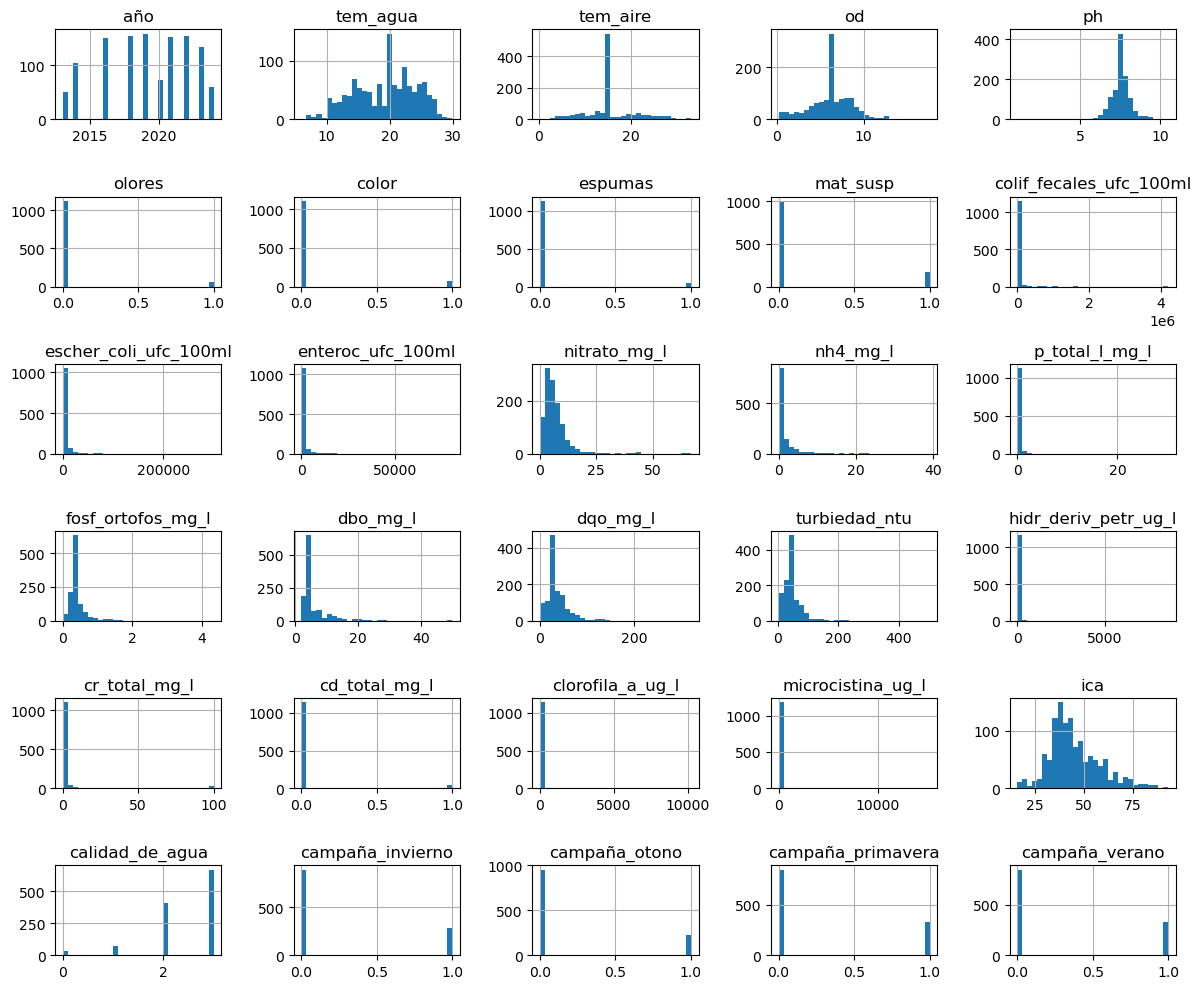

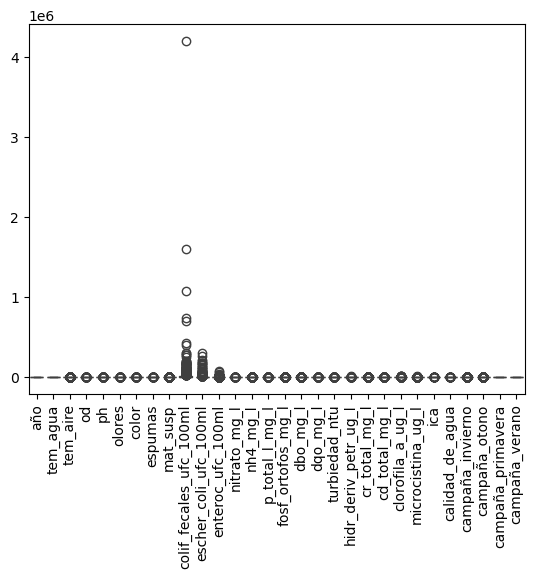

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#Realizamos varios Histogramas entres las variables
df_final.hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

#Boxplot para detectar outliers en las variables
sns.boxplot(data=df_final.select_dtypes(include='number'))
plt.xticks(rotation=90)
plt.show()

El gráfico boxplot se puede obsrevar la presencia de valores extremadamente altos, valores como outliers, que estan afectando negativamente la visualización y el análisis de los datos. Vamos a aplicar un tratamiento de reemplazo, ajustando los valores atípicos mediante el método del rango intercuartílico (IQR) para reducir su impacto sin eliminar registros.

In [10]:
#Observamos las metricas de las siguientes variables que tienen valores outliers
df_final[['colif_fecales_ufc_100ml', 'escher_coli_ufc_100ml', 'enteroc_ufc_100ml']].describe()

,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml
count,1.182000e+03,1182.000000,1182.000000
mean,2.104322e+04,5839.908122,1148.932479
std,1.413372e+05,20849.986647,4124.499353
min,1.000000e+00,1.000000,1.190000
25%,1.000000e+03,300.000000,160.000000
50%,3.050000e+03,900.000000,300.000000
75%,1.000000e+04,3000.000000,557.500000
max,4.200000e+06,300001.000000,80600.000000


Aplicamos el método del rango intercuartílico (IQR)

In [12]:
#Lista de variables con outliers
variables_outliers = ['colif_fecales_ufc_100ml', 'escher_coli_ufc_100ml', 'enteroc_ufc_100ml']

#Creamos una copia del DataFrame original para trabajar sin modificar df_final
df_limpio = df_final.copy()

#Aplicamos el reemplazo para cada variable
for var in variables_outliers:
    Q1 = df_limpio[var].quantile(0.25)
    Q3 = df_limpio[var].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    #Reemplazamos valores extremos por los límites
    df_limpio[var] = df_limpio[var].clip(lower=limite_inferior, upper=limite_superior)

#Mostramos las estadísticas después del reemplazo
print(df_limpio[variables_outliers].describe())

       colif_fecales_ufc_100ml  escher_coli_ufc_100ml  enteroc_ufc_100ml
count              1182.000000            1182.000000        1182.000000
mean               6985.774873            2113.342132         419.821861
std                8184.644067            2476.343550         373.459810
min                   1.000000               1.000000           1.190000
25%                1000.000000             300.000000         160.000000
50%                3050.000000             900.000000         300.000000
75%               10000.000000            3000.000000         557.500000
max               23500.000000            7050.000000        1153.750000


Luego de aplicar el metedo IQR , solo reemplazando los valores, suavizamos los valores extremos y evitando que influyan de forma desproporcionada en los análisis.
Desarrollamos algunas graficas de tipo Pairplot y violin plot.

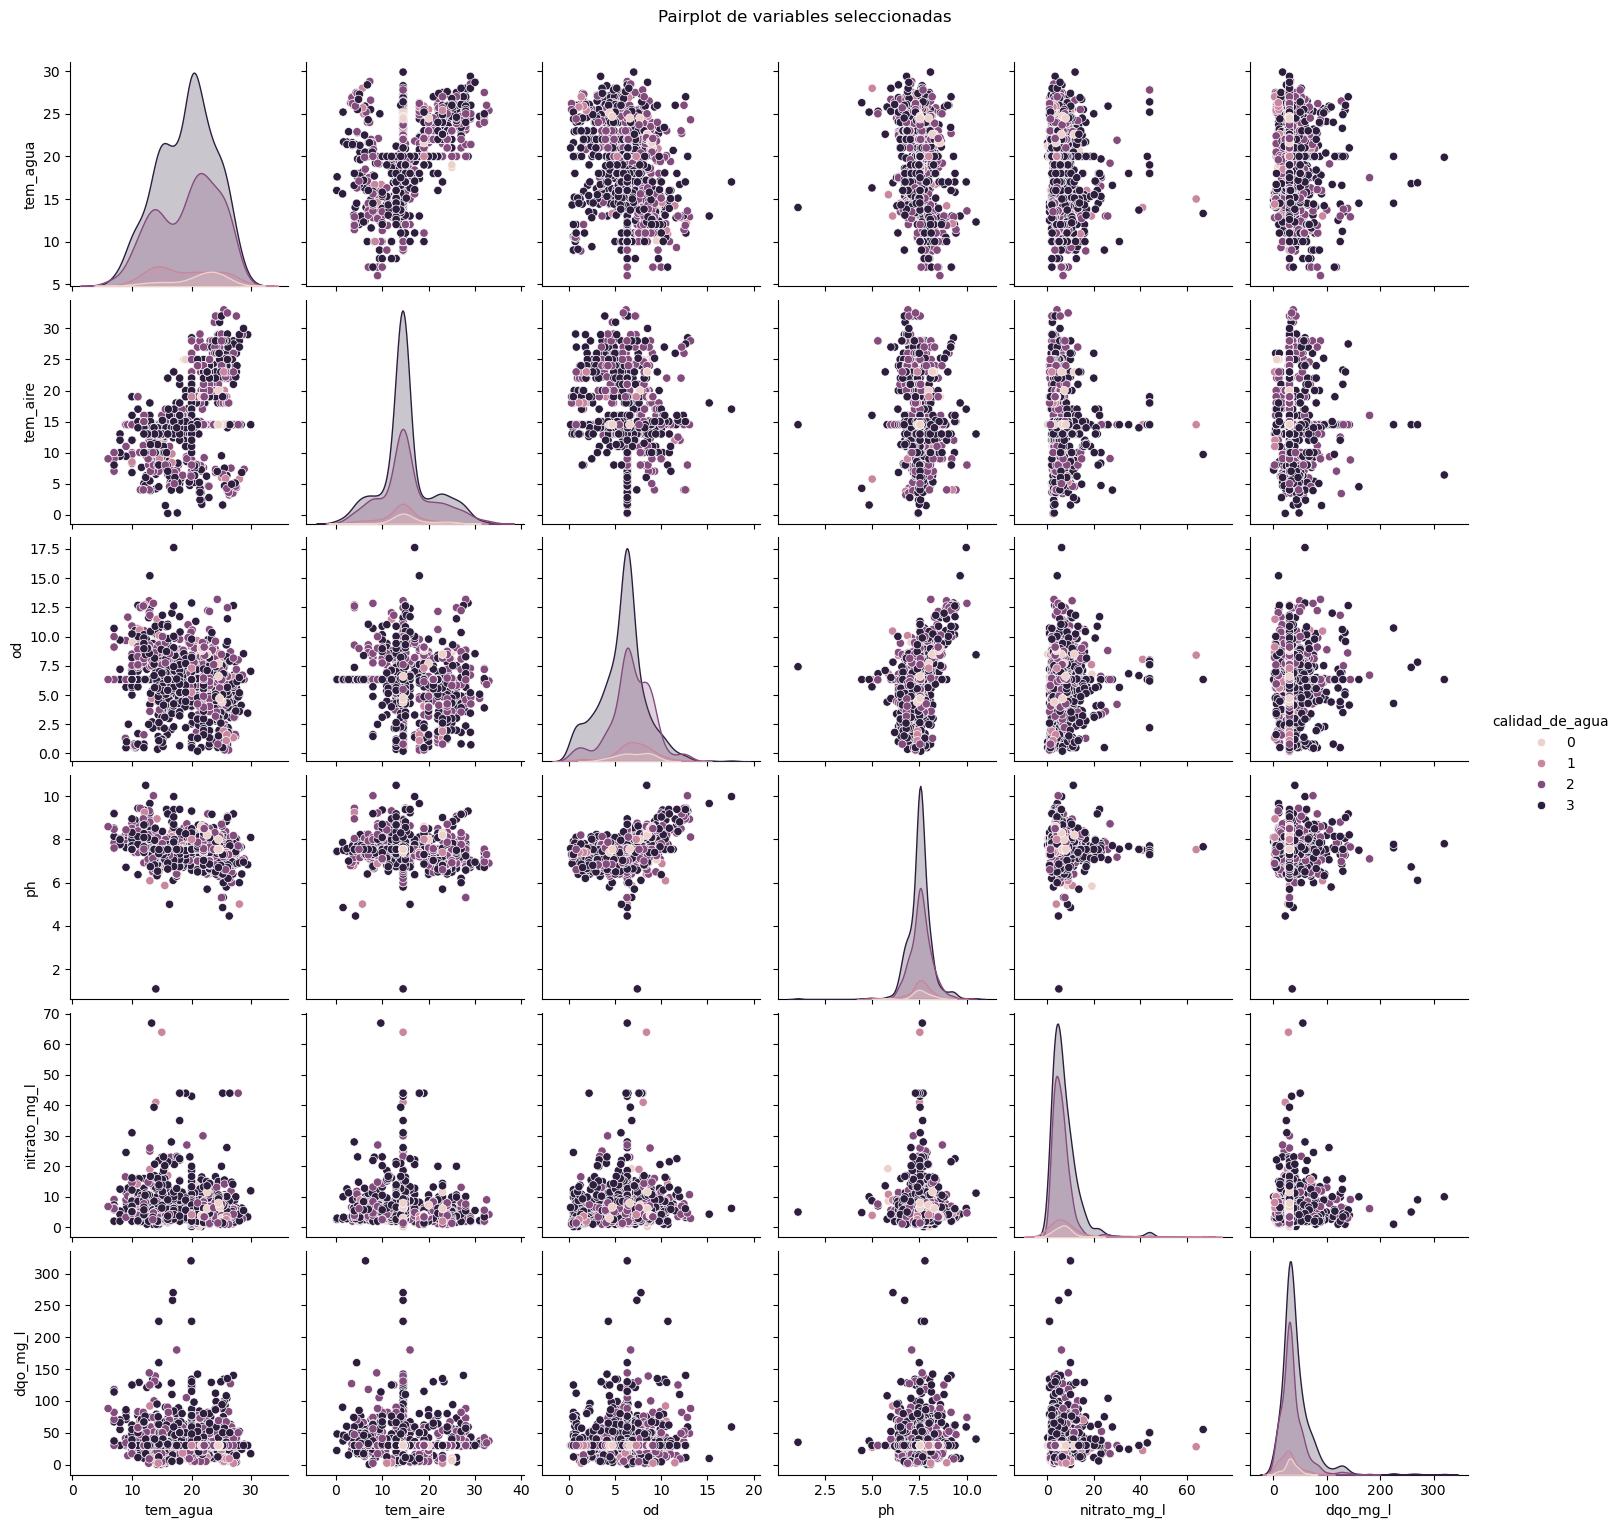

In [14]:
#Seleccionar algunas variables numéricas para el pairplot y generamos la grafica 
variables_seleccionadas = ['tem_agua', 'tem_aire', 'od', 'ph', 'nitrato_mg_l', 'dqo_mg_l']
sns.pairplot(df_limpio[variables_seleccionadas + ['calidad_de_agua']], hue='calidad_de_agua')
plt.suptitle("Pairplot de variables seleccionadas", y=1.02)
plt.show()

La gráfico de dispersión múltiple (pairplot) nos permite observar las relaciones entre varias variables numéricas, para este caso agregamos temperatura del agua, temperatura del aire, oxígeno disuelto, pH, nitrato y DQO, en función de la variable objetivo calidad_de_agua. Se pueden identificar patrones de agrupamiento entre clases, así como posibles correlaciones entre variables.

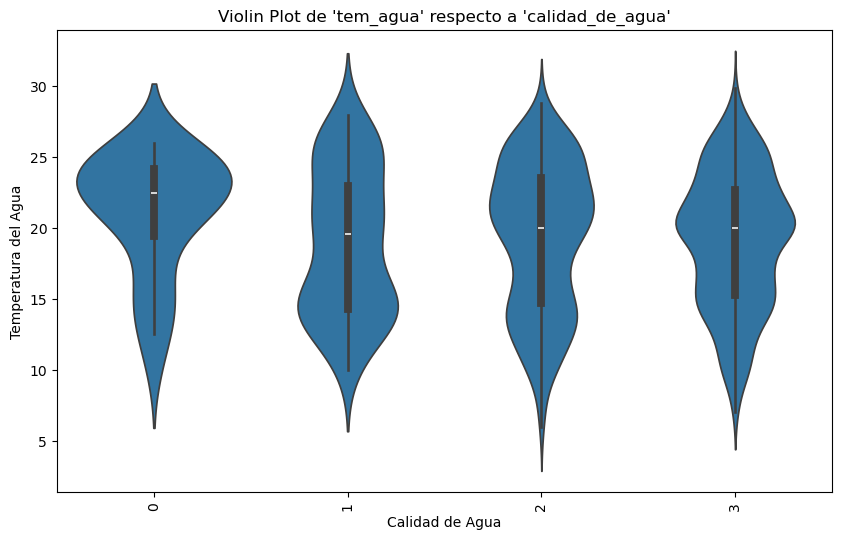

In [16]:
#Generamos el violin plot para la variable 'tem_agua' respecto a 'calidad_de_agua'
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_limpio, x='calidad_de_agua', y='tem_agua')
plt.title("Violin Plot de 'tem_agua' respecto a 'calidad_de_agua'")
plt.xlabel("Calidad de Agua")
plt.ylabel("Temperatura del Agua")
plt.xticks(rotation=90)
plt.show()

La grafica de violin plot nos sugiere que la temperatura del agua no varía significativamente entre los distintos niveles de calidad, por lo que no se evidencian indicios claros de que la temperatura esté directamente relacionada con el nivel de contaminación, al menos en este conjunto de datos.

Continuamos analizando la matriz de correlación para identificar qué variables presentan relaciones entre sí. Este paso es clave para detectar correlaciones lineales que puedan ser útiles en el análisis exploratorio y en la construcción del modelo que desarrollaremos.

In [19]:
#Calculamos y mostramos la matriz de correlación numérica
correlaciones = df_limpio.corr(numeric_only=True)
correlaciones

,año,tem_agua,tem_aire,od,ph,olores,color,espumas,mat_susp,colif_fecales_ufc_100ml,...,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua,campaña_invierno,campaña_otono,campaña_primavera,campaña_verano
año,1.000000,0.090345,0.272626,0.043395,-0.033773,0.137565,0.152983,0.057589,0.257596,0.061082,...,0.104036,0.229168,0.015684,-0.012514,-0.009851,0.102918,-0.159144,0.098020,0.006413,0.059210
tem_agua,0.090345,1.000000,0.396691,-0.240283,-0.235253,-0.055976,0.011008,-0.073312,-0.003620,-0.065132,...,-0.124670,-0.044431,-0.037345,0.004222,0.018192,-0.039018,-0.589821,-0.290612,0.297088,0.520656
tem_aire,0.272626,0.396691,1.000000,-0.139206,-0.133988,0.055280,0.076261,-0.033649,0.138371,-0.125287,...,-0.035874,0.013906,-0.026375,-0.008567,-0.006263,-0.016724,-0.236965,-0.179649,0.092072,0.291821
od,0.043395,-0.240283,-0.139206,1.000000,0.401642,-0.082930,-0.147401,0.000712,-0.096985,-0.109079,...,0.085440,0.016948,0.055393,0.016958,0.272766,-0.192161,0.045419,0.103833,-0.007640,-0.126988
ph,-0.033773,-0.235253,-0.133988,0.401642,1.000000,-0.059503,-0.071615,-0.032394,-0.129935,-0.066258,...,0.050234,0.017109,0.078399,0.011242,0.079054,-0.040454,0.043804,0.076915,0.000988,-0.110421
olores,0.137565,-0.055976,0.055280,-0.082930,-0.059503,1.000000,0.452238,0.378238,0.289150,0.177767,...,0.042288,-0.044828,-0.015593,-0.006899,-0.164187,0.102199,0.055194,-0.027267,-0.044479,0.015880
color,0.152983,0.011008,0.076261,-0.147401,-0.071615,0.452238,1.000000,0.323943,0.360489,0.104324,...,0.008591,-0.048768,-0.026119,-0.007655,-0.093906,0.051715,-0.053476,-0.008496,-0.002712,0.061207
espumas,0.057589,-0.073312,-0.033649,0.000712,-0.032394,0.378238,0.323943,1.000000,0.214952,0.118725,...,-0.030866,-0.016043,-0.023200,-0.005937,-0.095552,0.049529,0.023443,0.007597,-0.033923,0.004938
mat_susp,0.257596,-0.003620,0.138371,-0.096985,-0.129935,0.289150,0.360489,0.214952,1.000000,0.106954,...,-0.029149,-0.028473,-0.045140,-0.012399,-0.141058,0.116813,-0.037325,-0.066734,0.017246,0.077019
colif_fecales_ufc_100ml,0.061082,-0.065132,-0.125287,-0.109079,-0.066258,0.177767,0.104324,0.118725,0.106954,1.000000,...,0.086324,-0.114247,-0.020266,-0.017920,-0.480691,0.415395,0.051247,0.074941,-0.035575,-0.079156


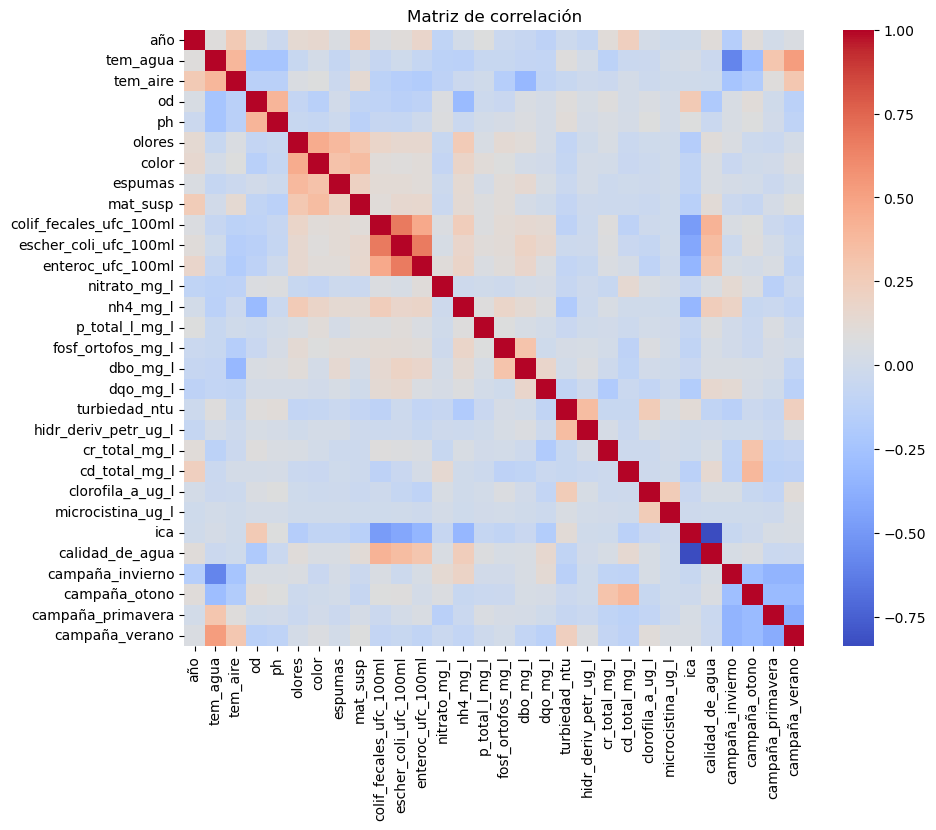

In [20]:
#Visualizar mapa de calor si lo querés ver igual
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=False, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

En la gráfica y tabla de la matriz de correlación entre variables ambientales, microbiológicas y de calidad del agua se pueden observar varios patrones, podemos encontrar una fuerte correlación positiva entre variables microbiológicas como coliformes fecales, Escherichia coli y enterococos, ya que todas son indicadores de contaminación fecal. También se destacan correlaciones entre nutrientes como nitrato, NH4 y pt_total, que suelen estar asociados a procesos de eutrofización. Por otro lado las variables como microcistinas o turbidez podrían mostrar correlaciones negativas con indicadores de calidad como el ICA o la calidad del agua, lo cual es coherente con el deterioro de las condiciones ambientales.

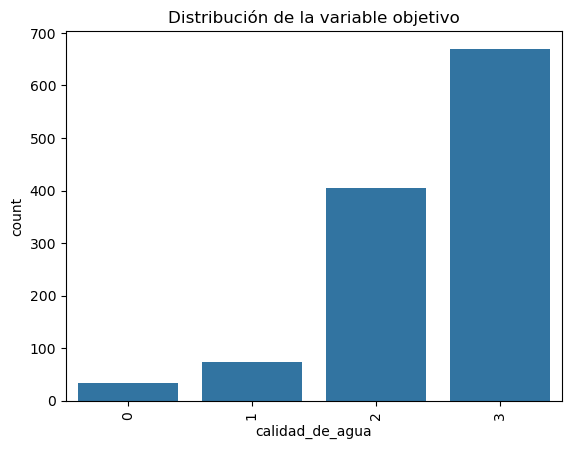

In [22]:
#Obserbamos la distribución de la variable objetivo "calidad_de_agua", 'levemente deteriorada': 0, 'deteriorada': 1, 'muy deteriorada': 2, 
# y 'extremadamente deteriorada': 3
sns.countplot(data=df_limpio, x='calidad_de_agua')
plt.title("Distribución de la variable objetivo")
plt.xticks(rotation=90)
plt.show()

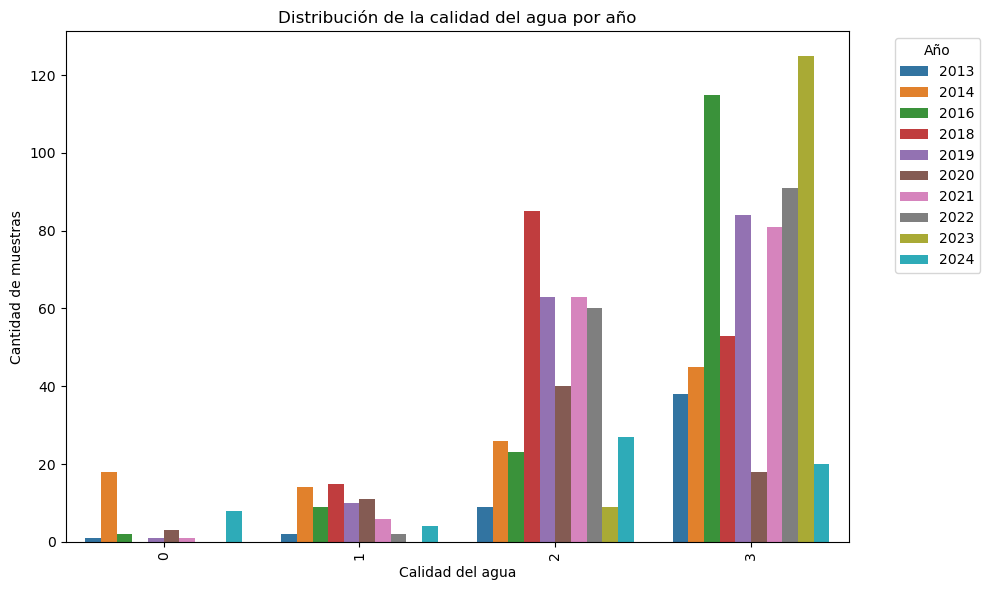

In [23]:
#Observamos la distrubucion de calidad de agua por periodo de años
plt.figure(figsize=(10, 6))
sns.countplot(data=df_limpio, x='calidad_de_agua', hue='año', palette='tab10')
plt.title("Distribución de la calidad del agua por año")
plt.xlabel("Calidad del agua")
plt.ylabel("Cantidad de muestras")
plt.xticks(rotation=90)
plt.legend(title="Año", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Al observar las graficas de distribución, en general nos dice que la calidad del agua en los registros disponibles es críticamente mala, pero tambien  podriamos decir al observar el comportamiento de la distribucion que el dataset está fuertemente desbalanceado, lo que puede afectar el rendimiento de modelos de clasificación, ya que tenderán a favorecer la clase (3) extremadamente deteriorada. Vamos a tener que aplicar la técnicas de balanceo de clases como SMOTE que es la mas usanda en estos casos, para evitar sesgos en la predicción.

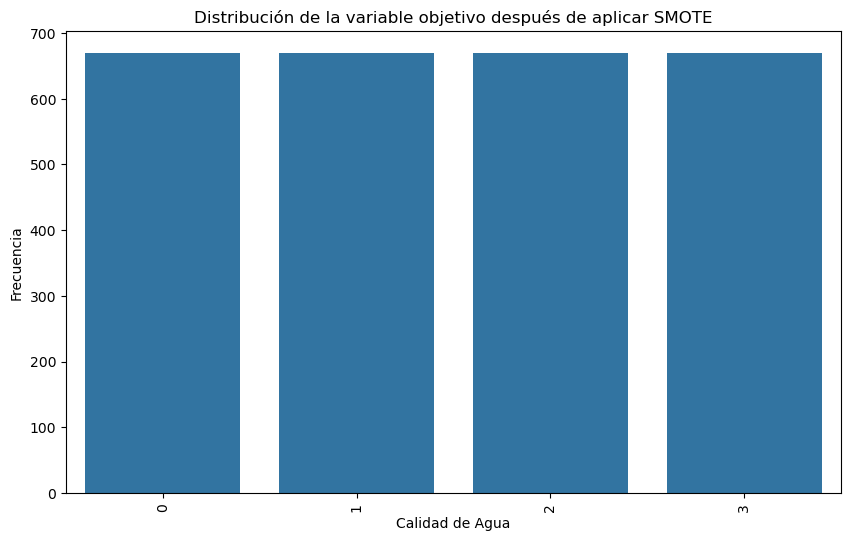

In [25]:
from imblearn.over_sampling import SMOTE

#Separamos la variable objetivo
X = df_limpio.drop(columns=['calidad_de_agua'])
y = df_limpio['calidad_de_agua']

#Aplicamosr SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

#Creamos nuevo DataFrame balanceado
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Visualizar la distribución después de SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(data=df_resampled, x='calidad_de_agua')
plt.title("Distribución de la variable objetivo después de aplicar SMOTE")
plt.xlabel("Calidad de Agua")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()


Todas las clases tienen ahora la misma cantidad de muestras, lo que me permite entrenar el modelo de clasificación más justos y precisos.

Aplicamos la técnica PCA (Análisis de Componentes Principales) con el objetivo de reducir la dimensionalidad del conjunto de datos. Esta técnica me permitira disminuir el número de variables manteniendo la mayor parte de la información (varianza), lo que facilita el análisis y puede mejorar la eficiencia y el rendimiento de los modelos.

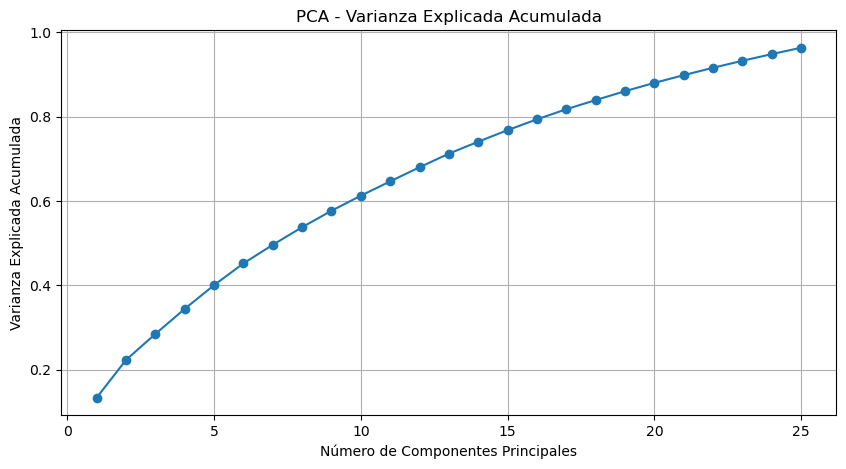

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Separamos características y variable objetivo
X = df_resampled.drop(columns=['calidad_de_agua'])
y = df_resampled['calidad_de_agua']

#Estandarizamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Aplicamos PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

#Vemos varianza explicada
explained_variance = pca.explained_variance_ratio_

#Graficamos varianza explicada acumulada
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('PCA - Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

En la grafica podemos observar los puntos del codo de la curva se encuentra aproximadamente en el componente número 25. A partir de este punto la curva comienza a aplanarse, lo que indica que agregar más componentes no aportaria mas ganancia adicional de información.

##  Modelado y entrenamiento de los datos

In [55]:
from sklearn.model_selection import train_test_split

#Dividir el conjunto de datos transformado por PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

#Mostrar dimensiones
print(f"Dimensiones del conjunto de entrenamiento: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Dimensiones del conjunto de prueba: X_test: {X_test.shape}, y_test: {y_test.shape}")

Dimensiones del conjunto de entrenamiento: X_train: (2144, 25), y_train: (2144,)
Dimensiones del conjunto de prueba: X_test: (536, 25), y_test: (536,)


Entrenamiento de modelos de clasificación Random Forest, KNN y Redes Neuronales

In [59]:
#Aplico Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Creamos y entrenamos el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#Realizamos predicciones
y_pred = rf_model.predict(X_test)

#Evaluamos el modelo
print("Accuracy del modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))


Accuracy del modelo: 0.8955223880597015

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       137
           1       0.93      0.93      0.93       131
           2       0.84      0.79      0.82       136
           3       0.83      0.86      0.85       132

    accuracy                           0.90       536
   macro avg       0.89      0.90      0.89       536
weighted avg       0.89      0.90      0.89       536


Matriz de confusión:
 [[136   0   0   1]
 [  4 122   4   1]
 [  0   7 108  21]
 [  0   2  16 114]]


In [61]:
#Aplicamos K vecino mas cercanos con k=5
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Creamos el modelo KNN con k=5 (puedes ajustar este valor)
knn_model = KNeighborsClassifier(n_neighbors=5)

#Entrenamos el modelo
knn_model.fit(X_train, y_train)

#Realizamos predicciones
y_pred_knn = knn_model.predict(X_test)

#Evaluamos el modelo
print("Accuracy del modelo KNN:", accuracy_score(y_test, y_pred_knn))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_knn))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred_knn))


Accuracy del modelo KNN: 0.8451492537313433

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       137
           1       0.78      0.89      0.83       131
           2       0.80      0.69      0.74       136
           3       0.90      0.80      0.85       132

    accuracy                           0.85       536
   macro avg       0.85      0.85      0.84       536
weighted avg       0.85      0.85      0.84       536


Matriz de confusión:
 [[136   0   1   0]
 [ 10 117   3   1]
 [  5  26  94  11]
 [  0   7  19 106]]


In [63]:
#Aplicamos Redes Neuronales aplicamos 100 neuronas con 500 iteraciones
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Creamos el modelo de red neuronal
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

#Entrenamos el modelo
mlp_model.fit(X_train, y_train)

#Realizamos predicciones
y_pred_mlp = mlp_model.predict(X_test)

#Evaluamos el modelo
print("Accuracy del modelo MLP:", accuracy_score(y_test, y_pred_mlp))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_mlp))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred_mlp))


Accuracy del modelo MLP: 0.9160447761194029

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       137
           1       0.94      0.94      0.94       131
           2       0.87      0.83      0.85       136
           3       0.87      0.89      0.88       132

    accuracy                           0.92       536
   macro avg       0.92      0.92      0.92       536
weighted avg       0.92      0.92      0.92       536


Matriz de confusión:
 [[137   0   0   0]
 [  2 123   5   1]
 [  1   6 113  16]
 [  0   2  12 118]]


C:\Users\destrada\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


En este análisis se aplicaron tres modelos de clasificación Random Forest, K-Vecinos (KNN) y Redes Neuronales (MLP) para predecir la calidad del agua en el Río de la Plata, utilizando un conjunto de datos previamente balanceado con SMOTE y reducido mediante PCA. El modelo de Redes Neuronales fue el que obtuvo el mejor desempeño general, alcanzando una accuracy del 91.6%, seguido por Random Forest con un 89.5% y KNN con un 84.5%. MLP mostró una excelente capacidad para distinguir entre las distintas clases, incluso en aquellas más difíciles como “muy deteriorada” y “extremadamente deteriorada”, donde otros modelos presentaron mayor confusión. Random Forest también ofreció un rendimiento sólido y equilibrado, especialmente en clases menos contaminadas, mientras que KNN fue el más débil, con mayor tendencia a confundir clases intermedias.